In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pi = np.pi

# Chapter 3<br>Interpolation

## 3.2 Interpolation Error

In [3]:
def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)
    
    def coef(points):
        if len(points) == 1:
            return points[0, 1]
        return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

### Q. 1

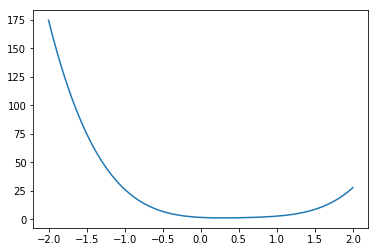

In [4]:
# (a)
points = np.array([(0.6, 1.433329), (0.7, 1.632316), (0.8, 1.896481), (0.9, 2.247908), (1.0, 2.718282)])

p_4 = Newton(points)
x_range = np.linspace(-2, 2, 1000)
y_range = p_4(x_range)

plt.plot(x_range, y_range)
plt.show()

In [5]:
# (b)
print("P_4(0.82): %f" % p_4(0.82))
print("P_4(0.98): %f" % p_4(0.98))

P_4(0.82): 1.958910
P_4(0.98): 2.612848


In [6]:
# (c)
# f(x) - p_4(x) = (x - 0.6)*(x - 0.7)*(x - 0.8)*(x - 0.9)*(x - 1)*(f'''''(c)) / 5!
# f'''''(x) = (32*x**5 + 160*x**3 + 120*x)*np.exp(x**2)
def error_bound(x):
    return abs((x - 0.6)*(x - 0.7)*(x - 0.8)*(x - 0.9)*(x - 1)*(32 + 160 + 120)*np.exp(1) / 120)

print("Error bound for x = 0.82: %4f" % error_bound(0.82))
print("Error bound for x = 0.98: %4f" % error_bound(0.98))

Error bound for x = 0.82: 0.000054
Error bound for x = 0.98: 0.000217


In [7]:
# (d)
def f(x):
    return np.exp(x**2)

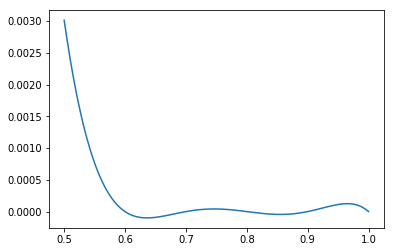

In [8]:
x_range = np.linspace(0.5, 1, 1000)
y_range = p_4(x_range) - f(x_range)

plt.plot(x_range, y_range)
plt.show()

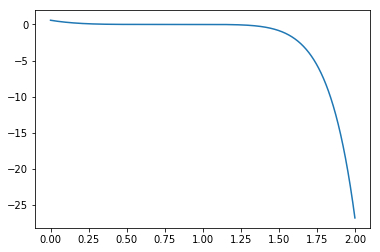

In [9]:
x_range = np.linspace(0, 2, 1000)
y_range = p_4(x_range) - f(x_range)

plt.plot(x_range, y_range)
plt.show()

### Q. 2

In [10]:
f_domain = np.linspace(0, pi/2, 4)
f_image = np.sin(f_domain)

def sin1(x):
    x_0 = np.mod(x, 2*pi)
    sgn = 1
    
    if x_0 > pi:
        x_0 -= pi
        sgn = -1
    if x_0 > pi/2:
        x_0 = pi - x_0
        
    return sgn * Newton(np.array([f_domain, f_image]).T)(x_0)

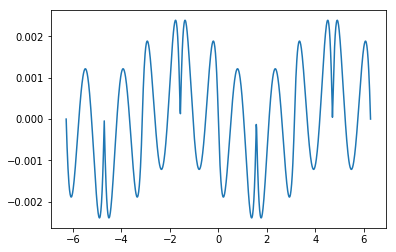

In [11]:
x_range = np.linspace(-2*pi, 2*pi, 1000)
y_range = [np.sin(x) - sin1(x) for x in x_range]

plt.plot(x_range, y_range)
plt.show()

### Q. 3

In [12]:
year = np.arange(1994, 2004)
oil = np.array([67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777])

points = np.array([year, oil]).T
f = Newton(points)

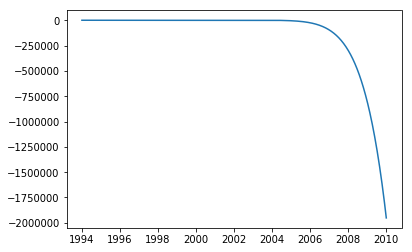

In [13]:
x_range = np.linspace(1994, 2010, 1000)
y_range = f(x_range)

plt.plot(x_range, y_range)
plt.show()

In [14]:
print("Oil production estimate at 2010: %f" % f(2010))

Oil production estimate at 2010: -1951646.134000


Runge phenomenon has occured in this example.

In this example, polynomial interpolation is not a good idea. As the values are nearly 70, Runge phenomenon has occured. Therefore, when estimating value of a point which is far from the given data, the value is surely prone to error.

### Q. 4

In [15]:
f = Newton(points[:4])

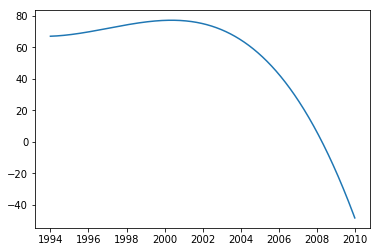

In [16]:
x_range = np.linspace(1994, 2010, 1000)
y_range = f(x_range)

plt.plot(x_range, y_range)
plt.show()

Runge phenomenon has occured.